In [1]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# OR use CSV if you downloaded it
# df = pd.read_csv('titanic.csv')


In [2]:
print(df.head())   # Displays the first 5 rows


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
print(df.info())   # Shows column names, data types, non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [4]:
print(df.describe())   # Mean, std, min, max, etc.


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [5]:
print(df.describe())   # Mean, std, min, max, etc.


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
print(df.describe(include='object'))   # Summary for strings and categories


         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   549


In [7]:
print(df.isnull().sum())   # Total null values in each column


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
print(df['sex'].value_counts())
print(df['embarked'].value_counts(dropna=False))  # Includes NaNs


sex
male      577
female    314
Name: count, dtype: int64
embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

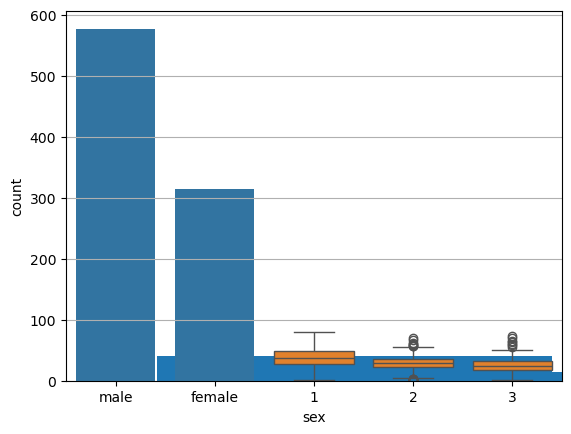

In [9]:
# Histogram for age
df['age'].hist(bins=20)

# Countplot for categorical column
sns.countplot(x='sex', data=df)

# Boxplot for age distribution
sns.boxplot(x='pclass', y='age', data=df)


<Axes: xlabel='survived', ylabel='count'>

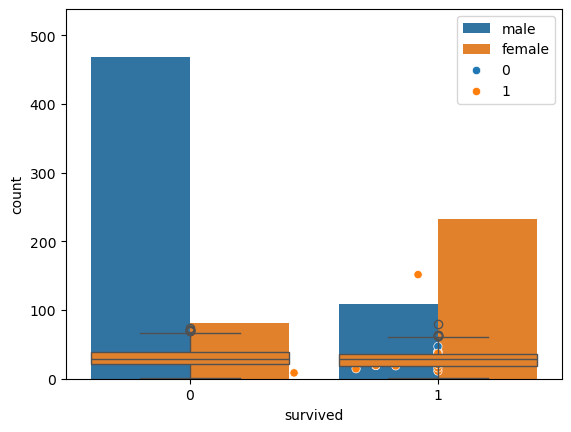

In [10]:
# Survived vs Sex
sns.countplot(x='survived', hue='sex', data=df)

# Age vs Fare
sns.scatterplot(x='age', y='fare', hue='survived', data=df)

# Boxplot of age by survived
sns.boxplot(x='survived', y='age', data=df)


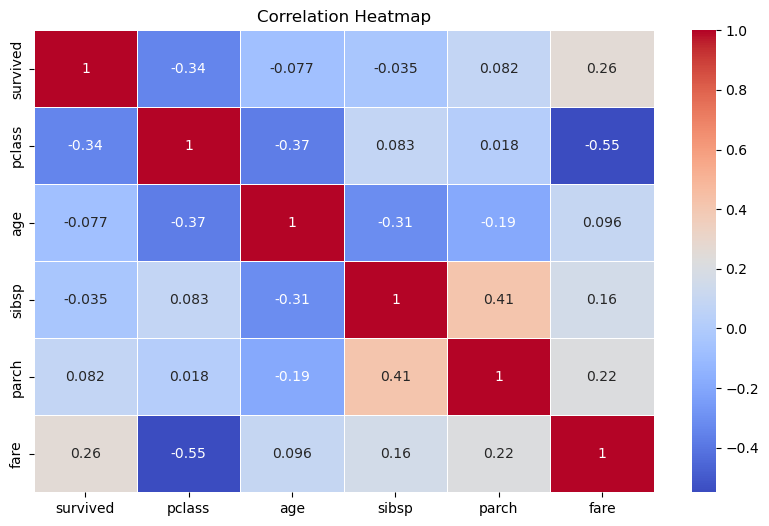

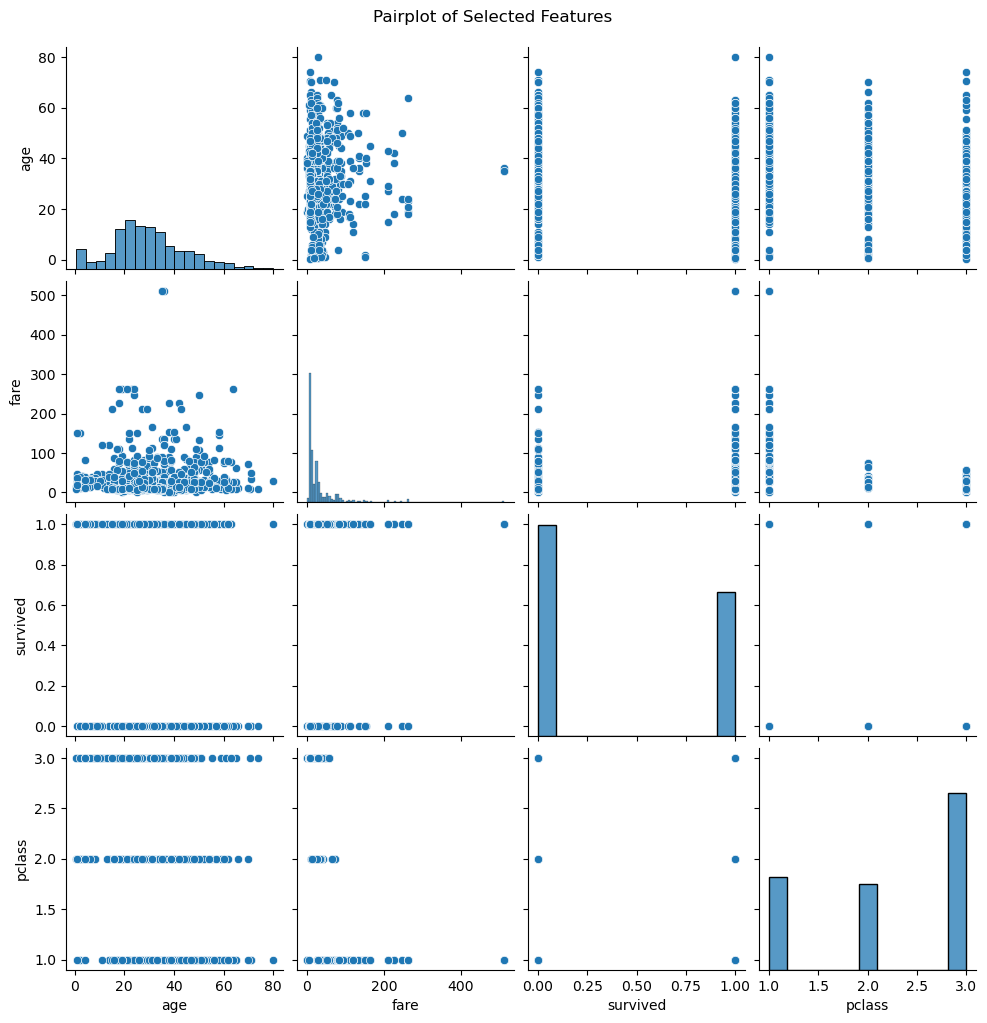

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('titanic')

# Drop non-numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['age', 'fare', 'survived', 'pclass']].dropna())
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
